In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
# Select relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = dataset[features]

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

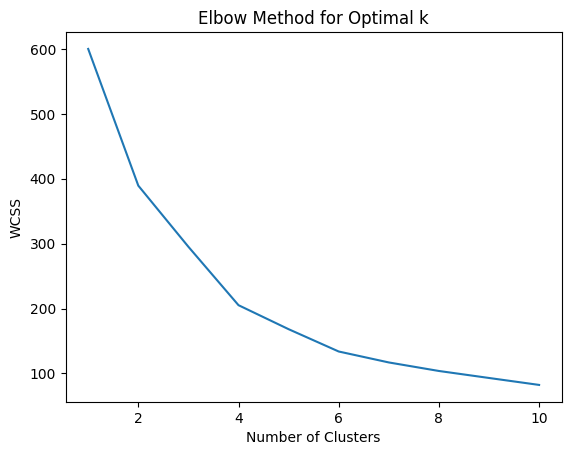

In [7]:
# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Based on the Elbow Method, let's choose k=5
k = 5
# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

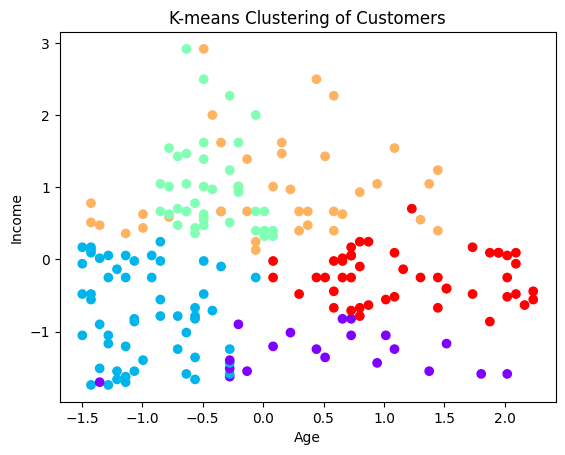

In [9]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dataset['Cluster'], cmap='rainbow')
plt.title('K-means Clustering of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [10]:
# Display the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
print("Cluster Centroids:")
print(centroids_df)

Cluster Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  25.185185           41.092593               62.240741
2  32.875000           86.100000               81.525000
3  39.871795           86.102564               19.358974
4  55.638298           54.382979               48.851064
